In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from handlandmark import get_hand_pixels
import imgaug.augmenters as iaa

In [3]:
# temp_1 = pd.read_csv('../data/data.csv')
# temp_2 = pd.read_csv('../data/temp-2.csv')

In [6]:
# print(len(temp_1))
# temp_1.head()

2515


,File Path,Label
0,data\asl_dataset\0\hand1_0_bot_seg_1_cropped.jpeg,0
1,data\asl_dataset\0\hand1_0_bot_seg_2_cropped.jpeg,0
2,data\asl_dataset\0\hand1_0_bot_seg_3_cropped.jpeg,0
3,data\asl_dataset\0\hand1_0_bot_seg_4_cropped.jpeg,0
4,data\asl_dataset\0\hand1_0_bot_seg_5_cropped.jpeg,0


In [7]:
# print(len(temp_2))
# temp_2.head()

87000


,File Path,Label
0,data\asl_alphabet_train\asl_alphabet_train\A\A...,a
1,data\asl_alphabet_train\asl_alphabet_train\A\A...,a
2,data\asl_alphabet_train\asl_alphabet_train\A\A...,a
3,data\asl_alphabet_train\asl_alphabet_train\A\A...,a
4,data\asl_alphabet_train\asl_alphabet_train\A\A...,a


In [8]:
# final = pd.concat([temp_1, temp_2], axis=0)
# len(final)

89515

In [23]:
final = pd.read_csv('../data/data.csv')


In [3]:
final.head()

,File Path,Label
0,data/asl_dataset/0/hand1_0_bot_seg_1_cropped.jpeg,0
1,data/asl_dataset/0/hand1_0_bot_seg_2_cropped.jpeg,0
2,data/asl_dataset/0/hand1_0_bot_seg_3_cropped.jpeg,0
3,data/asl_dataset/0/hand1_0_bot_seg_4_cropped.jpeg,0
4,data/asl_dataset/0/hand1_0_bot_seg_5_cropped.jpeg,0


In [24]:
len(final)

2515

In [4]:
final = final[~final['Label'].isin(['0','1','2','3','4','5','6','7','8','9','space','nothing','del'])]
final

,File Path,Label
700,data/asl_dataset/a/hand1_a_bot_seg_1_cropped.jpeg,a
701,data/asl_dataset/a/hand1_a_bot_seg_2_cropped.jpeg,a
702,data/asl_dataset/a/hand1_a_bot_seg_3_cropped.jpeg,a
703,data/asl_dataset/a/hand1_a_bot_seg_4_cropped.jpeg,a
704,data/asl_dataset/a/hand1_a_bot_seg_5_cropped.jpeg,a
...,...,...
89510,data/asl_alphabet_train/asl_alphabet_train/Z/Z...,z
89511,data/asl_alphabet_train/asl_alphabet_train/Z/Z...,z
89512,data/asl_alphabet_train/asl_alphabet_train/Z/Z...,z
89513,data/asl_alphabet_train/asl_alphabet_train/Z/Z...,z


In [8]:
final = final.reset_index(drop=True)

In [4]:
final

,File Path,Label
0,data/asl_dataset/0/hand1_0_bot_seg_1_cropped.jpeg,0
1,data/asl_dataset/0/hand1_0_bot_seg_2_cropped.jpeg,0
2,data/asl_dataset/0/hand1_0_bot_seg_3_cropped.jpeg,0
3,data/asl_dataset/0/hand1_0_bot_seg_4_cropped.jpeg,0
4,data/asl_dataset/0/hand1_0_bot_seg_5_cropped.jpeg,0
...,...,...
89510,data/asl_alphabet_train/asl_alphabet_train/Z/Z...,z
89511,data/asl_alphabet_train/asl_alphabet_train/Z/Z...,z
89512,data/asl_alphabet_train/asl_alphabet_train/Z/Z...,z
89513,data/asl_alphabet_train/asl_alphabet_train/Z/Z...,z


In [4]:
# for i in range(len(final)):
#     final.iloc[i,0] = final.iloc[i,0].replace('\\', '/')

In [6]:
# final.head()

In [5]:
path_prefix = '../'

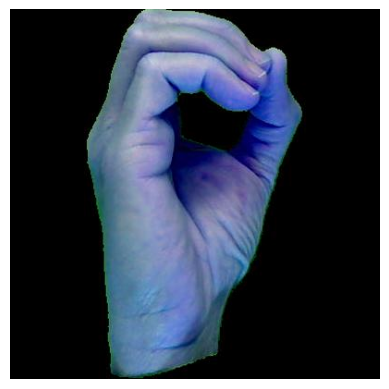

In [8]:
frame = cv2.imread(path_prefix + str(final['File Path'][0]))
plt.imshow(frame)
plt.axis('off')
plt.show()

In [9]:
seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.Crop(percent=(0, 0.1)), # crop images by 0-10% of their height/width
    iaa.GaussianBlur(sigma=(0.5, 1.0)), # blur images with a sigma of 0 to 1.0
    iaa.Multiply((0.5, 1.5), per_channel=0.5),  # change brightness
    iaa.ContrastNormalization((0.3, 1.0), per_channel=0.5),  # change contrast
    iaa.Add((-50, 50), per_channel=0.5)  # change brightness by adding a random value
])

c:\Users\luis\Desktop\Programs\finger-spelling-sign-language-model\venv\Lib\site-packages\imgaug\imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


In [ ]:
train_array = np.array([])
train_label = np.array([])
number_of_none = 0
for i in range(len(final)):
    pixels = cv2.resize(cv2.imread(path_prefix + str(final['File Path'][i])))
    pixels = cv2.resize(image, (128, 128), interpolation=cv2.INTER_AREA)
    if len(pixels) == 0:
        number_of_none += 1
        print(number_of_none)
        continue
    
    for img in pixels:       
        if train_array.size == 0:
            train_array = np.array([img / 255])
        else:
            train_array = np.append(train_array, [img / 255], axis=0)
        for i in range(2):
            augim = seq(image=img)
            train_array = np.append(train_array, [augim / 255], axis=0)
            train_label = np.append(train_label, final['Label'][i])     
        train_label = np.append(train_label, final['Label'][i])
    print(train_array.shape)
    

In [52]:
train_array = np.array([])
train_label = np.array([])
number_of_none = 0
for i in range(len(final)):
    for _ in range(2):
        train_label = np.append(train_label, final['Label'][i])     
    train_label = np.append(train_label, final['Label'][i])
    print(train_label.shape)
    

(3,)
(6,)
(9,)
(12,)
(15,)
(18,)
(21,)
(24,)
(27,)
(30,)
(33,)
(36,)
(39,)
(42,)
(45,)
(48,)
(51,)
(54,)
(57,)
(60,)
(63,)
(66,)
(69,)
(72,)
(75,)
(78,)
(81,)
(84,)
(87,)
(90,)
(93,)
(96,)
(99,)
(102,)
(105,)
(108,)
(111,)
(114,)
(117,)
(120,)
(123,)
(126,)
(129,)
(132,)
(135,)
(138,)
(141,)
(144,)
(147,)
(150,)
(153,)
(156,)
(159,)
(162,)
(165,)
(168,)
(171,)
(174,)
(177,)
(180,)
(183,)
(186,)
(189,)
(192,)
(195,)
(198,)
(201,)
(204,)
(207,)
(210,)
(213,)
(216,)
(219,)
(222,)
(225,)
(228,)
(231,)
(234,)
(237,)
(240,)
(243,)
(246,)
(249,)
(252,)
(255,)
(258,)
(261,)
(264,)
(267,)
(270,)
(273,)
(276,)
(279,)
(282,)
(285,)
(288,)
(291,)
(294,)
(297,)
(300,)
(303,)
(306,)
(309,)
(312,)
(315,)
(318,)
(321,)
(324,)
(327,)
(330,)
(333,)
(336,)
(339,)
(342,)
(345,)
(348,)
(351,)
(354,)
(357,)
(360,)
(363,)
(366,)
(369,)
(372,)
(375,)
(378,)
(381,)
(384,)
(387,)
(390,)
(393,)
(396,)
(399,)
(402,)
(405,)
(408,)
(411,)
(414,)
(417,)
(420,)
(423,)
(426,)
(429,)
(432,)
(435,)
(438,)
(441,)
(444,)


In [47]:
train_array = np.load('../data/data-aug-128-rgb.npy')

In [54]:
train_label = np.load('../data/label-aug-128-rgb.npy')

In [49]:
train_array.shape

(7545, 128, 128, 3)

In [55]:
train_label.shape

(7545,)

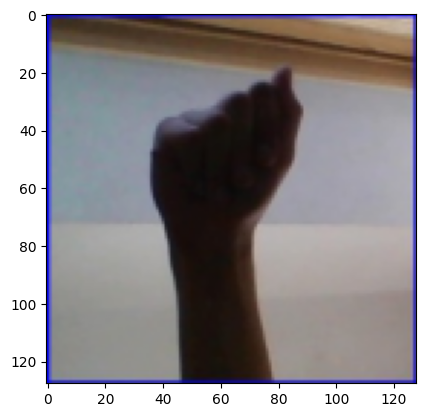

In [42]:
plt.imshow(train_array[7545])
plt.show()

In [27]:
number_of_none

0

In [20]:
train_array[:-1].shape

(7927, 128, 128, 3)

In [19]:
train_label.shape

(7927,)

In [20]:
temp = np.append(train_label, 'c')
temp.shape

(10000,)

In [24]:
train_label.shape

(10000,)

In [43]:
np.save('../data/data-aug-128-rgb.npy', train_array[:7545])

In [53]:
np.save('../data/label-aug-128-rgb.npy', train_label)

In [3]:
train_array = np.load('../data/all-data-final-notaug-64-rgb(0).npy')

In [4]:
train_label = np.load('../data/all-labels-final-notaug-64-rgb(0).npy', allow_pickle=True)

In [32]:
train_label[6000]

'0'

In [8]:
model = load_model('../models/CNN-128-rgb.h5')

In [15]:
np.unique(train_label)

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'],
      dtype='<U32')

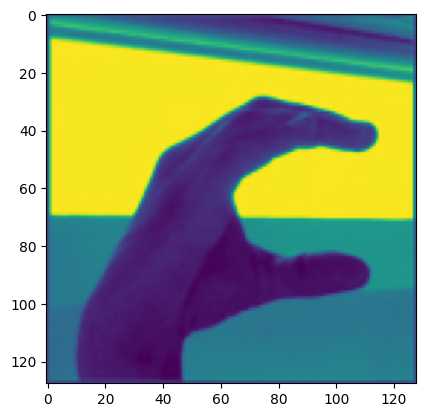

In [18]:
plt.imshow(train_array[-1])
plt.show()